In [ ]:
!pip install langgraph

In [4]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [10]:
class AgentState(TypedDict):
  first_num: int
  second_num: int
  operator: str
  result: int

In [27]:
def adder(state: AgentType) -> AgentType:
  """This is a function that adds two numbers"""
  state["result"] = state["first_num"] + state["second_num"]
  return state

def subtractor(state: AgentType) -> AgentType:
  """This is a function that subtracts two numbers"""
  state["result"] = state["first_num"] - state["second_num"]
  return state

def decide_operator(state: AgentType) -> AgentType:
  """This is a function that decides which operator to use"""
  if state["operator"] == "+":
    return "addition_operation"
  elif state["operator"] == "-":
    return "subtraction_operation"

In [37]:
graph = StateGraph(AgentState)
graph.add_node("add_node",adder)
graph.add_node("sub_node", subtractor)
graph.add_node("decide_node", lambda state: state)

graph.add_edge(START, "decide_node")
graph.add_conditional_edges(
    "decide_node",
    decide_operator,
    {
        "addition_operation":"add_node",
        "subtraction_operation":"sub_node"
    }
)
graph.add_edge("add_node", END)
graph.add_edge("sub_node", END)

app = graph.compile()


In [38]:
print(app.get_graph().draw_mermaid())

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	add_node(add_node)
	sub_node(sub_node)
	decide_node(decide_node)
	__end__([<p>__end__</p>]):::last
	__start__ --> decide_node;
	decide_node -. &nbsp;addition_operation&nbsp; .-> add_node;
	decide_node -. &nbsp;subtraction_operation&nbsp; .-> sub_node;
	add_node --> __end__;
	sub_node --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



In [21]:
from IPython.display import Image, display

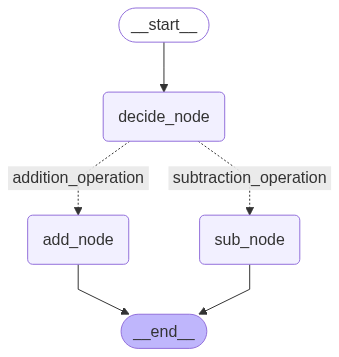

In [39]:
display(Image(app.get_graph().draw_mermaid_png()))

In [40]:
initial_state_1 = AgentState(first_num = 10, operator="-", second_num = 5)
print(app.invoke(initial_state_1))

{'first_num': 10, 'second_num': 5, 'operator': '-', 'result': 5}


In [41]:
result = app.invoke({"first_num": 10, "operator": "-", "second_num": 5})
print(result)

{'first_num': 10, 'second_num': 5, 'operator': '-', 'result': 5}
